### Question 8  

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a
SGDClassifier on the same dataset. See if you can get them to produce roughly
the same model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
np.random.seed(42)

class_0 = np.random.randn(50, 2) + np.array([-3, -3])
class_1 = np.random.randn(50, 2) + np.array([3, 3])

X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

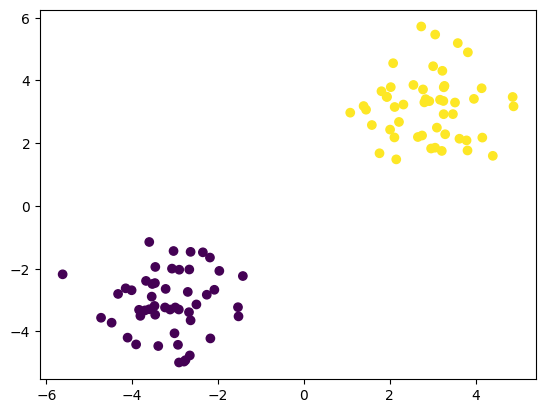

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 1, loss='hinge').fit(X,y)

##### Marginal lines and best fit lines

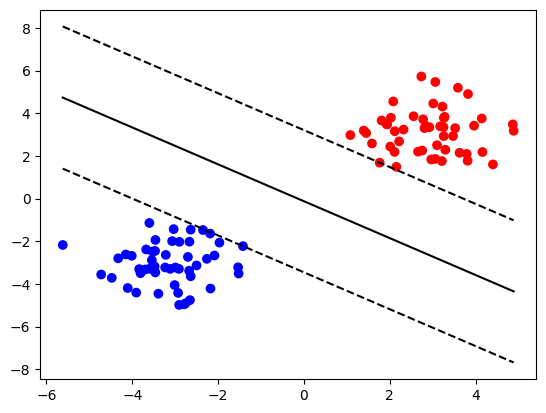

In [5]:
plt.scatter(X[:,0], X[:, 1],c=y, cmap="bwr")
weights = svc.coef_[0]      #w1 and w2
intercept = svc.intercept_
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
bestfit_line= -(weights[0]*x_vals + intercept) / weights[1]
margin_positive = -(weights[0]*x_vals + intercept - 1) / weights[1]
margin_negative = -(weights[0]*x_vals + intercept + 1) / weights[1]

# Plot lines
plt.plot(x_vals, bestfit_line, "k-")      # main line
plt.plot(x_vals, margin_positive, "k--")       # upper margin
plt.plot(x_vals, margin_negative, "k--")       # lower margin


In [6]:
np.random.seed(100)  # different seed for new data

X_test = np.random.randn(40, 2)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int)

In [7]:
linear_pred = svc.predict(X_test)
linear_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

##### Evaluating the model

In [8]:
from sklearn.metrics import accuracy_score
print("The accuracy score for linear svc is: ", accuracy_score(y_test, linear_pred))

The accuracy score for linear svc is:  0.95
